In [61]:
mes = [12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
       1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2,
       3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3,
       4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2]
anio =[2015,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2017,
       2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2018,2018,2018,2018,
       2018,2018,2018,2018,2018,2018,2018,2018,2019,2019,2019,2019,2019,2019,2019,
       2019,2019,2019,2019,2019,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,
       2020,2020,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,2022,2022,
       2022,2022,2022,2022,2022,2022,2022,2022,2022,2022,2023,2023,2023,2023,2023,2023,
       2023,2023,2023,2023,2023,2023,2024,2024,2024,2024,2024,2024,2024,2024,2024,2024,
       2024,2024,2025,2025]
poder_adquisitivo = [
    -4.94, -8.77, -11.73, -14.39, -18.42, -7.97, -10.09, -12.06, -11.98, -7.77,
    -9.97, -6.14, -6.42, -7.84, -9.74, -8.86, -10.87, -12.4, -8.25, -9.78,
    -11.03, -5.7, -7.09, -3.8, -6.69, -8.34, -8.5, -10.56, -12.91, -10.43,
    -13.63, -16.23, -14.92, -17.08, -14.49, -17.14, -19.24, -18.38, -18.95, -16.81,
    -19.54, -18.84, -20.97, -19.7, -22.79, -21.69, -19.49, -22.81, -25.57, -26.06,
    -27.51, -23.02, -24.16, -23.03, -22.69, -24.13, -26.12, -28.13, -25.92, -28.22,
    -30.98, -32.3, -32.09, -32.76, -30.24, -32.47, -30.93, -32.94, -32.28, -31.24,
    -29.82, -31.53, -30.51, -31.18, -30.57, -29.18, -25.0, -29.24, -32.68, -27.01,
    -25.72, -27.13, -29.07, -29.35, -29.74, -26.42, -29.84, -32.78, -31.1, -25.79,
    -26.82, -26.7, -25.31, -21.93, -24.18, -26.0, -23.47, -26.05, -38.1, -48.67,
    -47.4, -46.93, -47.32, -44.89, -45.21, -43.36, -44.02, -44.83, -42.63, -42.85, -43.8]

import pandas as pd

data = pd.DataFrame({
    'anio': anio,
    'mes': mes,
    'poder_adquisitivo': poder_adquisitivo
})
meses_espanol = {
    1: "Enero", 2: "Febrero", 3: "Marzo", 4: "Abril", 5: "Mayo", 6: "Junio",
    7: "Julio", 8: "Agosto", 9: "Septiembre", 10: "Octubre", 11: "Noviembre", 12: "Diciembre"
}

# miramos los datos
data.head()

,anio,mes,poder_adquisitivo
0,2015,12,-4.94
1,2016,1,-8.77
2,2016,2,-11.73
3,2016,3,-14.39
4,2016,4,-18.42


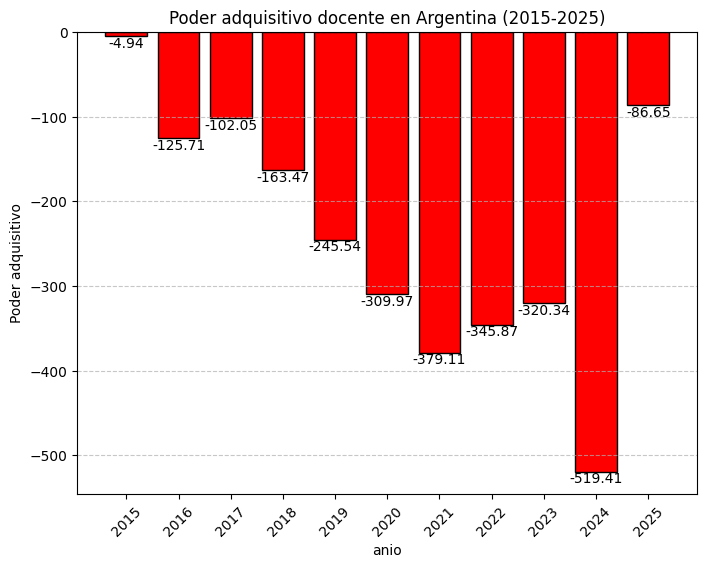

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
poder_adquisitivo_por_anio = data.groupby('anio')['poder_adquisitivo'].sum().reset_index()
bars = plt.bar(poder_adquisitivo_por_anio['anio'].astype(str), poder_adquisitivo_por_anio['poder_adquisitivo'], color='red', edgecolor='black')
# Agregar el valor de la altura encima de cada barra
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{bar.get_height():.2f}',
        ha='center',
        va='top',
        color='black',
        fontsize=10,
    )
plt.title('Poder adquisitivo docente en Argentina (2015-2025)')
plt.xlabel('anio')
plt.ylabel('Poder adquisitivo')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('poder_adquisitivo.png', dpi=300, bbox_inches='tight')
plt.show()


In [63]:
# Elijo dos periodos de 12 meses
periodo2016 = data.loc[data['anio'] == 2016]
periodo2024 = data.loc[data['anio'] == 2024]

In [64]:
#Defino la funcion para graficar los dos dataframes
def grafico_indice(periodo):
    plt.figure(figsize=(8, 6))
    plt.plot(periodo['mes'], periodo['poder_adquisitivo'], marker='o', color='red', label='Poder adquisitivo')
    for x, y in zip(periodo['mes'], periodo['poder_adquisitivo']):
        plt.text(
            x, y, 
            f'{y:.2f}',
            fontsize=10,
            ha='center',
            va='bottom',
            color='black'
        )
    plt.title(f'Poder adquisitivo docente en Argentina ({periodo["anio"].iloc[0]})')
    plt.xlabel('Mes')
    plt.xticks(periodo['mes'], [meses_espanol[m] for m in periodo['mes']], rotation=45)
    plt.ylabel('Poder adquisitivo')
    plt.xticks(rotation=45)
    plt.grid(linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()


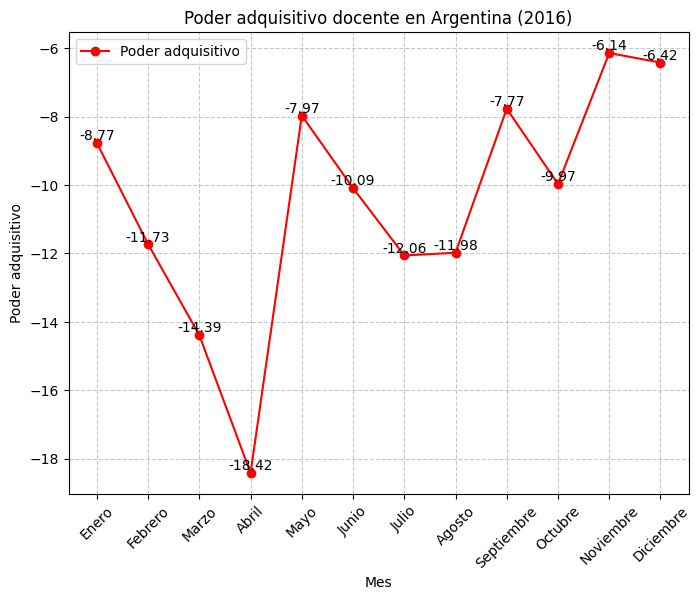

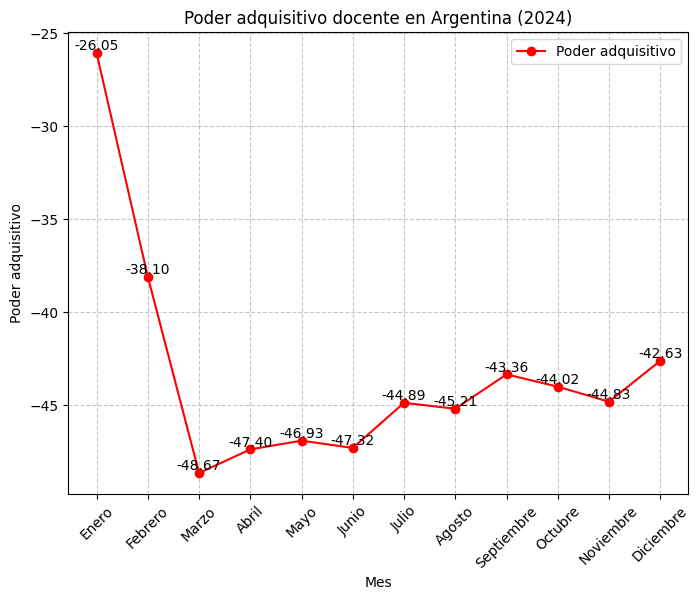

In [65]:
grafico_indice(periodo2016)
grafico_indice(periodo2024)